In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from PIL import Image

In [3]:
img = Image.open("go-git-original.png")

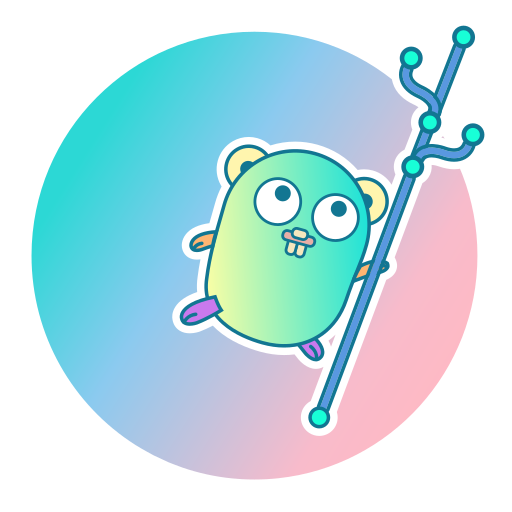

In [4]:
img

In [5]:
asarray(img).shape

(512, 512, 4)

In [6]:
from scipy.spatial.distance import pdist

In [7]:
imgdata = asarray(img)
seed(7)
randomrows = imgdata.copy()
shuffle(randomrows)

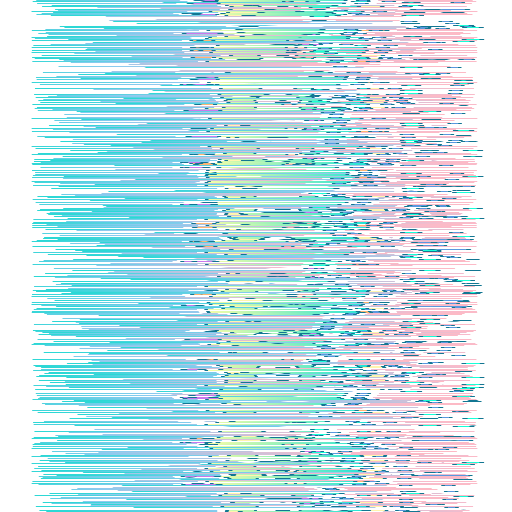

In [8]:
Image.fromarray(randomrows)

In [9]:
dists = __builtin__.sum(pdist(randomrows[:, :, i]) for i in range(4))

In [10]:
dists.shape

(130816,)

In [11]:
import sys
sys.path.append("..")
from seriate import seriate

In [12]:
order = seriate(dists)

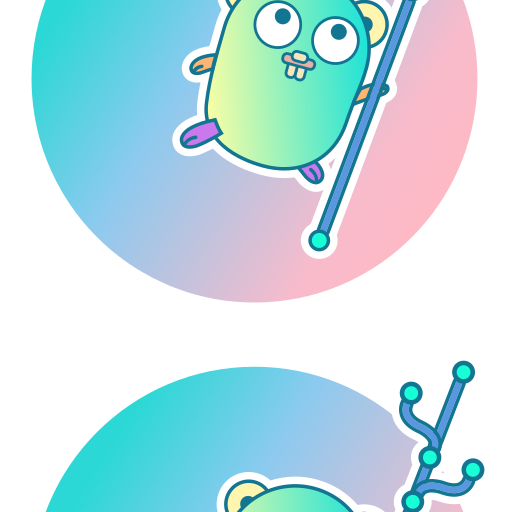

In [13]:
Image.fromarray(randomrows[order])

In [23]:
# determine the best roll - provided by we know the original data
for shift in range(100, 200):
    if (imgdata == randomrows[roll(order, shift)]).all():
        print(shift)
        break

177


As can be seen, we have an exact, precise solution

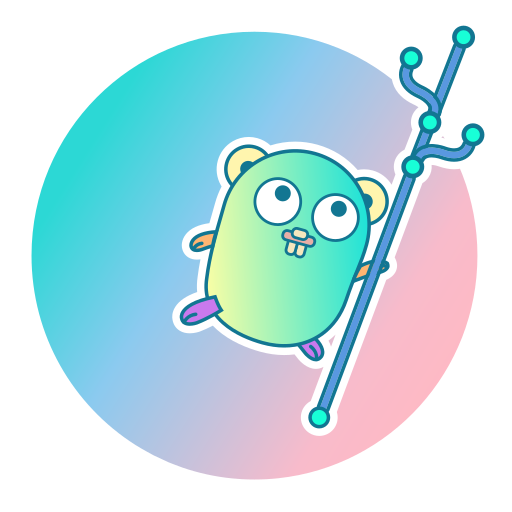

In [24]:
Image.fromarray(randomrows[roll(order, 177)])

In [28]:
Image.fromarray(randomrows).save("go-git-shuffled.png")

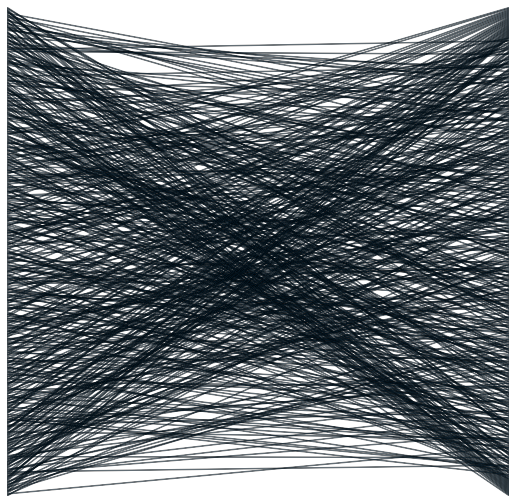

In [31]:
rcParams["figure.figsize"] = 9, 9
for i, j in enumerate(roll(order, 177)):
    # i - the new, fixed index
    # j - the old, shuffled index
    arrow(0, j / randomrows.shape[1], 1, i / randomrows.shape[1] - j / randomrows.shape[1],
          head_length=0, head_width=0, alpha=0.5)
xticks([]); yticks([])
axis("off")
savefig("go-git-mapping.png", pad_inches=0, bbox_inches="tight", dpi=100, transparent=True)